# Customer Churn predication

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df=pd.read_csv("C:\\Users\\Rajat-PC\\Downloads\\Customer Churn Data.csv")

In [187]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


In [188]:
df.drop("AccountID",axis=1,inplace=True)

In [189]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [191]:
df.isna().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [192]:
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [193]:
df["Tenure"].unique()

array(['4', '0', '2', '13', '11', '#', '9', '99', '19', '20', '14', '8',
       '26', '18', '5', '30', '7', '1', '23', '3', '29', '6', '28', '24',
       '25', '16', '10', '15', '22', nan, '27', '12', '21', '17', '50',
       '60', '31', '51', '61'], dtype=object)

In [194]:
df["Tenure"].replace("#",np.nan,inplace=True)

In [195]:
df["Tenure"].unique()

array(['4', '0', '2', '13', '11', nan, '9', '99', '19', '20', '14', '8',
       '26', '18', '5', '30', '7', '1', '23', '3', '29', '6', '28', '24',
       '25', '16', '10', '15', '22', '27', '12', '21', '17', '50', '60',
       '31', '51', '61'], dtype=object)

In [196]:
df["Tenure"].median()


9.0

In [197]:
df["Tenure"].replace(np.nan,9,inplace=True)

In [198]:
df['City_Tier'].unique()

array([ 3.,  1., nan,  2.])

In [199]:
df['City_Tier'].median()

1.0

In [200]:
df['City_Tier'].replace(np.nan,1,inplace=True)

In [201]:
df['CC_Contacted_LY'].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [202]:
df['CC_Contacted_LY'].median()

16.0

In [203]:
df['CC_Contacted_LY'].replace(np.nan,16,inplace=True)

In [204]:
df['Payment'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [205]:
df['Payment'].mode()

0    Debit Card
Name: Payment, dtype: object

In [206]:
df['Payment'].replace(np.nan,"Debit Card",inplace=True)

In [207]:
df['Gender'].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [208]:
df['Gender'].replace('Female','F',inplace=True)

In [209]:
df['Gender'].replace('Male','M',inplace=True)

In [210]:
df['Gender'].unique()

array(['F', 'M', nan], dtype=object)

In [211]:
df['Gender'].mode()

0    M
Name: Gender, dtype: object

In [212]:
df['Gender'].replace(np.nan,"M")

0        F
1        M
2        M
3        M
4        M
        ..
11255    M
11256    M
11257    M
11258    M
11259    M
Name: Gender, Length: 11260, dtype: object

In [213]:
df['Service_Score'].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [214]:
df['Service_Score'].median()

3.0

In [215]:
df['Service_Score'].replace(np.nan,3,inplace=True)

In [216]:
df['Account_user_count'].unique()

array(['3', '4', nan, '5', '2', '@', '1', '6'], dtype=object)

In [217]:
df['Account_user_count'].replace('@',np.nan,inplace=True)

In [218]:
df['Account_user_count'].unique()

array(['3', '4', nan, '5', '2', '1', '6'], dtype=object)

In [219]:
df['Account_user_count'].mode()

0    4
Name: Account_user_count, dtype: object

In [220]:
df['Account_user_count'].replace(np.nan,4,inplace=True)

In [221]:
df['account_segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [222]:
df['account_segment'].replace('Super +','Super Plus',inplace=True)

In [223]:
df['account_segment'].replace('Regular +','Regular Plus',inplace=True)

In [224]:
df['account_segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus'],
      dtype=object)

In [225]:
df['account_segment'].mode()

0    Regular Plus
Name: account_segment, dtype: object

In [226]:
df['account_segment'].replace(np.nan,'Regular Plus',inplace=True)

In [227]:
df['CC_Agent_Score'].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [228]:
df['CC_Agent_Score'].mode()

0    3.0
Name: CC_Agent_Score, dtype: float64

In [229]:
df['CC_Agent_Score'].replace(np.nan,3.0,inplace=True)

In [230]:
df['Marital_Status'].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [231]:
df['Marital_Status'].mode()

0    Married
Name: Marital_Status, dtype: object

In [232]:
df['Marital_Status'].replace(np.nan,'Married',inplace=True)

In [233]:
df['rev_per_month'].unique()

array(['9', '7', '6', '8', '3', '2', '4', '10', '1', '5', '+', '130', nan,
       '19', '139', '102', '120', '138', '127', '123', '124', '116', '21',
       '126', '134', '113', '114', '108', '140', '133', '129', '107',
       '118', '11', '105', '20', '119', '121', '137', '110', '22', '101',
       '136', '125', '14', '13', '12', '115', '23', '122', '117', '131',
       '104', '15', '25', '135', '111', '109', '100', '103'], dtype=object)

In [234]:
df['rev_per_month'].replace('+',np.nan,inplace=True)

In [235]:
df['rev_per_month'].median()

5.0

In [236]:
df['rev_per_month'].replace(np.nan,5,inplace=True)

In [237]:
df['Complain_ly'].unique()

array([ 1.,  0., nan])

In [238]:
df['Complain_ly'].mode()

0    0.0
Name: Complain_ly, dtype: float64

In [239]:
df['Complain_ly'].replace(np.nan,0,inplace=True)

In [240]:
df['rev_growth_yoy'].unique()

array(['11', '15', '14', '23', '22', '16', '12', '13', '17', '18', '24',
       '19', '20', '21', '25', '26', '$', '4', '27', '28'], dtype=object)

In [241]:
df['rev_growth_yoy'].replace('$',np.nan,inplace=True)

In [242]:
df['rev_growth_yoy'].median()

15.0

In [243]:
df['rev_growth_yoy'].replace(np.nan,15,inplace=True)

In [244]:
df['coupon_used_for_payment'].unique()

array(['1', '0', '4', '2', '9', '6', '11', '7', '12', '10', '5', '3',
       '13', '15', '8', '#', '$', '14', '*', '16'], dtype=object)

In [245]:
df['coupon_used_for_payment'].replace('#',np.nan,inplace=True)

In [246]:
df['coupon_used_for_payment'].replace('$',np.nan,inplace=True)

In [247]:
df['coupon_used_for_payment'].replace('*',np.nan,inplace=True)

In [248]:
df['coupon_used_for_payment'].median()

1.0

In [249]:
df['coupon_used_for_payment'].replace(np.nan,1,inplace=True)

In [250]:
df['Day_Since_CC_connect'].unique()

array(['5', '0', '3', '7', '2', '1', '8', '6', '4', '15', nan, '11', '10',
       '9', '13', '12', '17', '16', '14', '30', '$', '46', '18', '31',
       '47'], dtype=object)

In [251]:
df['Day_Since_CC_connect'].replace('$',np.nan,inplace=True)

In [252]:
df['Day_Since_CC_connect'].mode()

0    3
Name: Day_Since_CC_connect, dtype: object

In [253]:
df['Day_Since_CC_connect'].replace(np.nan,3,inplace=True)

In [254]:
df['cashback'].unique()

array(['160', '121', nan, '134', '130', '139', '123', '127', '295', '154',
       '196', '129', '157', '161', '150', '162', '203', '117', '207',
       '142', '173', '190', '143', '1974', '133', '209', '122', '120',
       '194', '126', '299', '125', '187', '131', '111', '205', '145',
       '128', '290', '287', '195', '237', '300', '159', '268', '136',
       '144', '153', '166', '163', '168', '138', '167', '176', '149',
       '204', '185', '200', '225', '236', '189', '222', '206', '0', '179',
       '188', '124', '132', '292', '261', '291', '137', '1955', '164',
       '165', '169', '294', '135', '152', '269', '156', '140', '235',
       '218', '220', '276', '146', '147', '158', '114', '180', '155',
       '260', '112', '221', '148', '219', '271', '1813', '175', '151',
       '293', '283', '215', '171', '183', '1862', '197', '267', '243',
       '1982', '184', '266', '296', '280', '241', '270', '279', '191',
       '198', '141', '232', '174', '262', '216', '119', '282', '254',
     

In [255]:
df['cashback'].replace('$',np.nan,inplace=True)

In [256]:
df['cashback'].median()

165.0

In [257]:
df['cashback'].replace(np.nan,165,inplace=True)

In [258]:
df['Login_device'].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [259]:
df['Login_device'].mode()

0    Mobile
Name: Login_device, dtype: object

In [260]:
df['Login_device'].replace(np.nan,'Mobile',inplace=True)

In [261]:
df['Login_device'].replace('&&&&',np.nan,inplace=True)

In [262]:
df.isna().sum()/df.shape[0]*100

Churn                      0.000000
Tenure                     0.000000
City_Tier                  0.000000
CC_Contacted_LY            0.000000
Payment                    0.000000
Gender                     0.959147
Service_Score              0.000000
Account_user_count         0.000000
account_segment            0.000000
CC_Agent_Score             0.000000
Marital_Status             0.000000
rev_per_month              0.000000
Complain_ly                0.000000
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
Day_Since_CC_connect       0.000000
cashback                   0.000000
Login_device               4.786856
dtype: float64

In [263]:
df.shape

(11260, 18)

In [264]:
df.isna().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                     108
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               539
dtype: int64

In [265]:
df['Gender'].unique()

array(['F', 'M', nan], dtype=object)

In [266]:
df['Gender'].mode()

0    M
Name: Gender, dtype: object

In [267]:
df['Gender'].replace(np.nan,"M",inplace=True)

In [268]:
df.isna().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               539
dtype: int64

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  object 
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  object 
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  object 
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

# eda

In [270]:
df['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [271]:
df['Gender'].value_counts()

M    6812
F    4448
Name: Gender, dtype: int64

C:\Users\Rajat-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

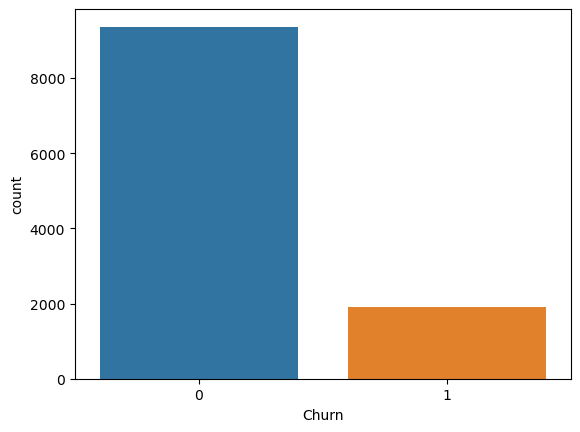

In [272]:
sns.countplot(df['Churn'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

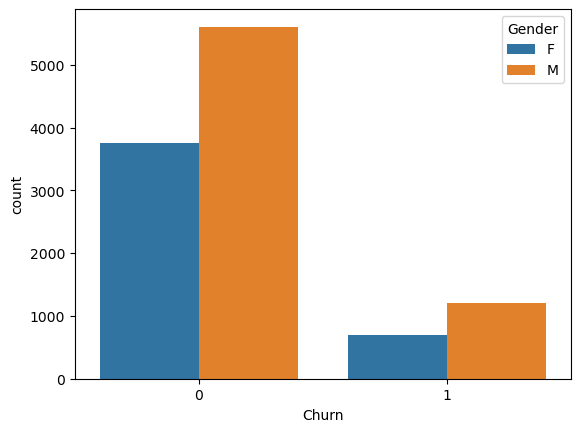

In [273]:
sns.countplot(x='Churn',hue='Gender', data=df)

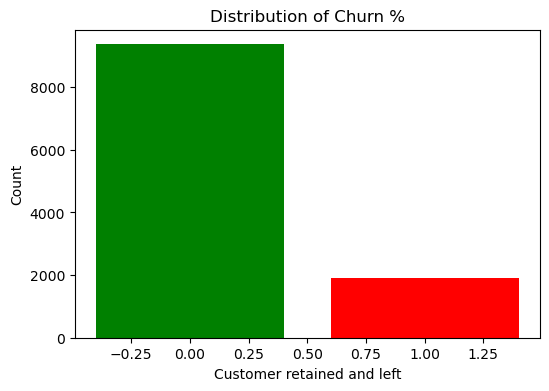

In [274]:
fig, axes = plt.subplots(figsize=(6,4))
data = df["Churn"].value_counts()
axes.bar(data.index, data.values, color=['green', 'red'])
axes.set_title('Distribution of Churn %')
axes.set_ylabel('Count')
axes.set_xlabel('Customer retained and left')
plt.show()


<AxesSubplot:xlabel='Gender', ylabel='count'>

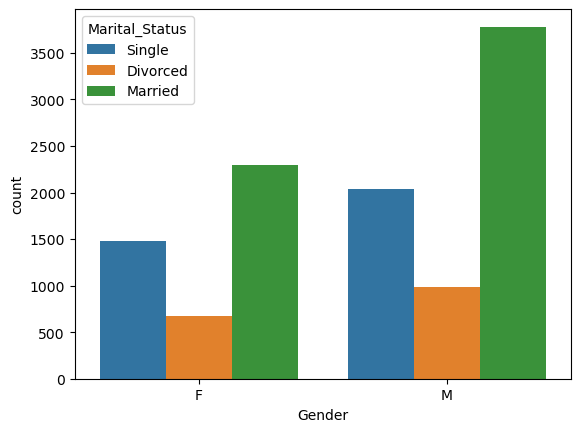

In [275]:
sns.countplot(x="Gender",hue="Marital_Status",data=df)

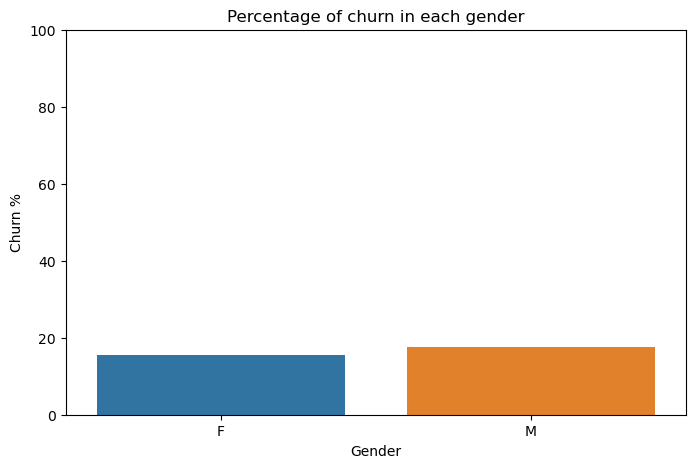

In [276]:

fig, axes3 = plt.subplots(figsize=(8,5))

# Chances of churn based on gender
sns.barplot(x="Gender", y=df["Churn"]*100, data=df, ci=None, ax=axes3)
axes3.set_xlabel('Gender')
axes3.set_ylabel('Churn %')
axes3.set_title('Percentage of churn in each gender')
axes3.set_ylim(0,100)
plt.show()

C:\Users\Rajat-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

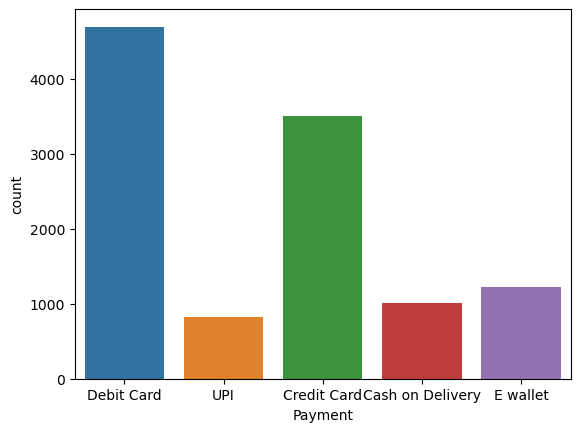

In [278]:
sns.countplot(df.Payment)

<AxesSubplot:>

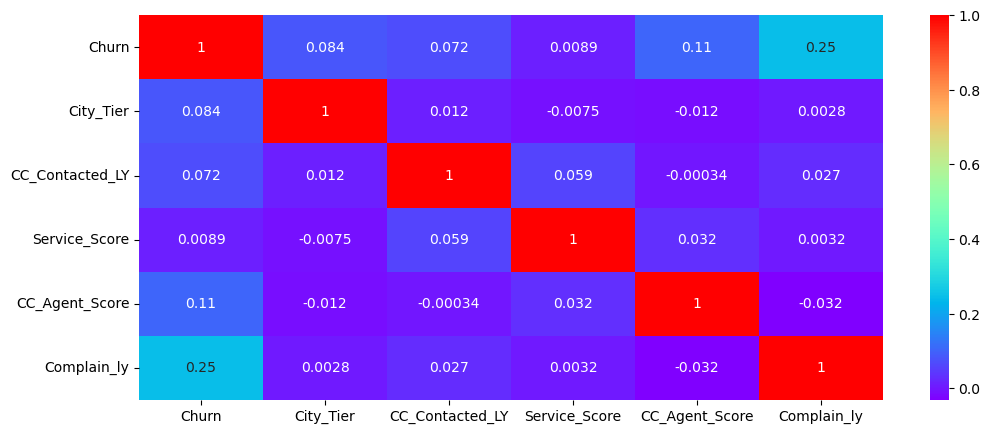

In [279]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),
           yticklabels=True,
           cbar=True,
           cmap='rainbow',
           annot=True,
           linewidths=0,
           linecolor="grey")

<AxesSubplot:xlabel='Churn'>

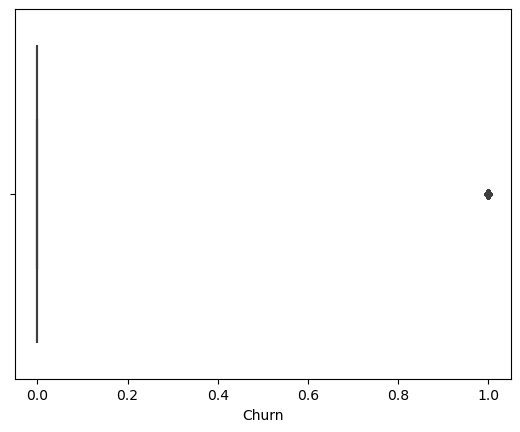

In [281]:
sns.boxplot(x="Churn",data=df)

In [184]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,F,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,1,0,1.0,8.0,UPI,M,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,1,0,1.0,30.0,Debit Card,M,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,165,Mobile
3,1,0,3.0,15.0,Debit Card,M,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,1,0,1.0,12.0,Credit Card,M,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


# ENCODING CATAGORICAL DATA

In [282]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [283]:
le=LabelEncoder()

In [285]:
df["Payment"]=le.fit_transform(df.Payment)

In [286]:
df["Gender"]=le.fit_transform(df.Gender)

In [287]:
df["account_segment"]=le.fit_transform(df.account_segment)

In [288]:
df["Marital_Status"]=le.fit_transform(df.Marital_Status)

In [289]:
df["Login_device"]=le.fit_transform(df.Login_device)

In [290]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,2,0,3.0,3,3,2.0,2,9,1.0,11,1,5,160,1
1,1,0,1.0,8.0,4,1,3.0,4,2,3.0,2,7,1.0,15,0,0,121,1
2,1,0,1.0,30.0,2,1,2.0,4,2,3.0,2,6,1.0,14,0,3,165,1
3,1,0,3.0,15.0,2,1,2.0,4,3,5.0,2,8,0.0,23,0,3,134,1
4,1,0,1.0,12.0,1,1,2.0,3,2,5.0,2,3,0.0,11,1,3,130,1


# HENDALING IMBLANCE DATA

In [292]:
df.Churn.value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

C:\Users\Rajat-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

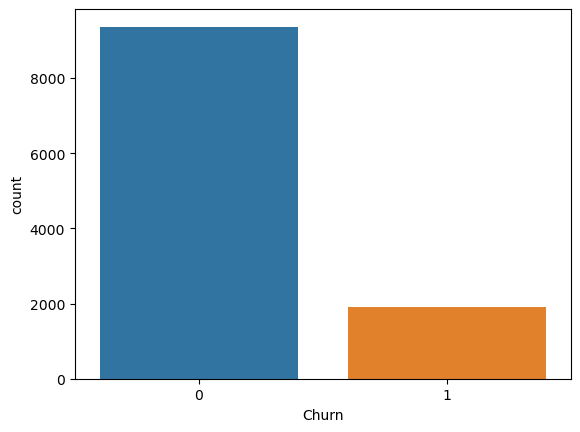

In [293]:
sns.countplot(df.Churn)

In [294]:
from imblearn.over_sampling import SMOTE

In [297]:
x=df.drop("Churn",axis=1)

In [298]:
y=df["Churn"]

In [301]:
x.head(1)

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4,3.0,6.0,2,0,3.0,3,3,2.0,2,9,1.0,11,1,5,160,1


In [302]:
y.head(1)

0    1
Name: Churn, dtype: int64

In [304]:
x_re,y_re=SMOTE().fit_resample(x,y)

In [305]:
y_re.value_counts()

1    9364
0    9364
Name: Churn, dtype: int64

# SPLITING THE DATASET INTO THE TRAINING DATASET AND TESTING DATASET

In [309]:
from sklearn.model_selection import train_test_split

In [311]:
x_train,x_test,y_train,y_test=train_test_split(x_re,y_re,test_size=.2,random_state=101)


# Feature Scaling

In [313]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [314]:
x_train

array([[-0.65322882,  1.42792809, -0.04039183, ..., -1.1292528 ,
        -0.38400811, -1.33321745],
       [ 0.28407766,  1.42792809,  0.30026721, ...,  1.636502  ,
         0.2321567 ,  0.57782961],
       [ 0.36218653, -0.79090214,  0.07316118, ...,  0.80677556,
        -0.25859403, -1.33321745],
       ...,
       [-0.55535967,  0.03784904,  1.94610827, ..., -0.71273915,
        -0.25176178,  0.57782961],
       [ 0.19256913, -0.41025965,  1.945122  , ...,  1.30437445,
        -0.13956817, -1.33321745],
       [-0.34079332,  1.42792809,  1.81125616, ..., -0.85267732,
         0.0199376 ,  0.57782961]])

In [315]:
x_test

array([[-0.58403073, -0.13047381, -1.06736083, ..., -0.2933866 ,
        -0.13519547, -1.31518347],
       [ 0.55932459, -0.79873574, -0.85117032, ..., -1.14645667,
        -0.38212762, -1.31518347],
       [-0.01235307, -0.79873574, -0.85117032, ...,  1.69711023,
        -0.05662615, -1.31518347],
       ...,
       [-0.58403073, -0.79873574,  0.73756351, ..., -0.57774329,
        -0.22498898,  0.62981348],
       [-0.66569896,  0.51408855,  0.58200916, ..., -1.14645667,
        -0.33369947,  0.62981348],
       [ 0.55932459, -0.79873574, -1.19161328, ...,  1.12839685,
        -0.35406715,  0.62981348]])

# Logistic regression 

In [316]:
from sklearn.linear_model import LogisticRegression

In [317]:
lr=LogisticRegression()

In [318]:
lr.fit(x_train,y_train)

LogisticRegression()

In [319]:
pred=lr.predict(x_test)

In [320]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc

In [321]:
print(confusion_matrix(pred,y_test))

[[1416  391]
 [ 387 1552]]


In [322]:
print(accuracy_score(pred,y_test))

0.792311799252536


In [323]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [324]:
 precision_score(pred,y_test)

0.7987647967061245

In [325]:
recall_score(pred,y_test)

0.8004125838060856

In [326]:
f1_score(pred,y_test)

0.7995878413189077

In [327]:
f1_score(y_test,pred)

0.7995878413189077

# KNeighborsClassifier

In [328]:
from sklearn.neighbors import KNeighborsClassifier


In [329]:
knn=KNeighborsClassifier()

In [330]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [331]:
pred1=knn.predict(x_test)

C:\Users\Rajat-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [332]:
print(confusion_matrix(pred1,y_test))

[[1657   40]
 [ 146 1903]]


In [333]:
print(accuracy_score(pred1,y_test))

0.9503470368392952


In [334]:
 precision_score(pred1,y_test)

0.9794132784354092

In [335]:
recall_score(pred1,y_test)

0.928745729624207

In [336]:
f1_score(pred1,y_test)

0.9534068136272547

# DecisionTreeClassifier

In [337]:
from sklearn.tree import DecisionTreeClassifier


In [338]:
dt=DecisionTreeClassifier()

In [339]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [340]:
pred2=dt.predict(x_test)

In [341]:
print(confusion_matrix(pred2,y_test))

[[1249   44]
 [ 554 1899]]


In [342]:
print(accuracy_score(pred2,y_test))

0.8403630539241858


In [343]:
 precision_score(pred2,y_test)

0.9773546062789501

In [344]:
recall_score(pred2,y_test)

0.7741540970240521

In [345]:
f1_score(pred2,y_test)

0.8639672429481345

# RandomForestClassifier

In [346]:
from sklearn.ensemble import RandomForestClassifier

In [347]:
rf=RandomForestClassifier()

In [348]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [349]:
pred3=rf.predict(x_test)

In [350]:
print(confusion_matrix(pred3,y_test))

[[1574   13]
 [ 229 1930]]


In [351]:
print(accuracy_score(pred3,y_test))

0.9353977576081153


In [352]:
 precision_score(pred3,y_test)

0.993309315491508

In [353]:
recall_score(pred3,y_test)

0.8939323761000463

In [355]:
f1_score(pred3,y_test)

0.9410043881033643

In [361]:
acc_score=pd.DataFrame({"models":["LR","KNN","DT","RF"],
                          "ACC":[accuracy_score(pred,y_test),
                                accuracy_score(pred1,y_test),
                                accuracy_score(pred2,y_test),
                                accuracy_score(pred3,y_test)]})

In [365]:
acc_score

,models,ACC
0,LR,0.792312
1,KNN,0.950347
2,DT,0.840363
3,RF,0.935398


<AxesSubplot:xlabel='models', ylabel='ACC'>

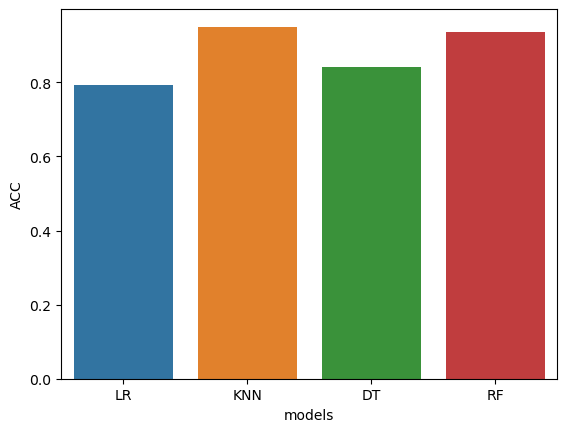

In [366]:
sns.barplot(x=acc_score.models,y=acc_score.ACC)

In [370]:
pre_score=pd.DataFrame({"models":["LR","KNN","DT","RF"],
                          "PRE":[precision_score(pred,y_test),
                                precision_score(pred1,y_test),
                                precision_score(pred2,y_test),
                                precision_score(pred3,y_test)]})

In [371]:
pre_score

,models,PRE
0,LR,0.798765
1,KNN,0.979413
2,DT,0.977355
3,RF,0.993309


<AxesSubplot:xlabel='models', ylabel='PRE'>

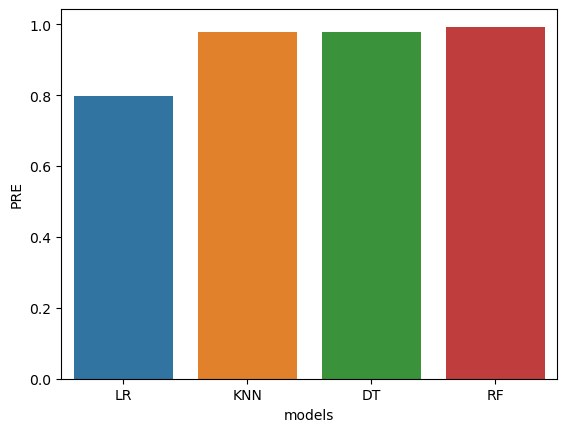

In [372]:
sns.barplot(x=pre_score.models,y=pre_score.PRE)

In [373]:
r_score=pd.DataFrame({"models":["LR","KNN","DT","RF"],
                          "recall_score":[recall_score(pred,y_test),
                                recall_score(pred1,y_test),
                                recall_score(pred2,y_test),
                               recall_score(pred3,y_test)]})

<AxesSubplot:xlabel='models', ylabel='recall_score'>

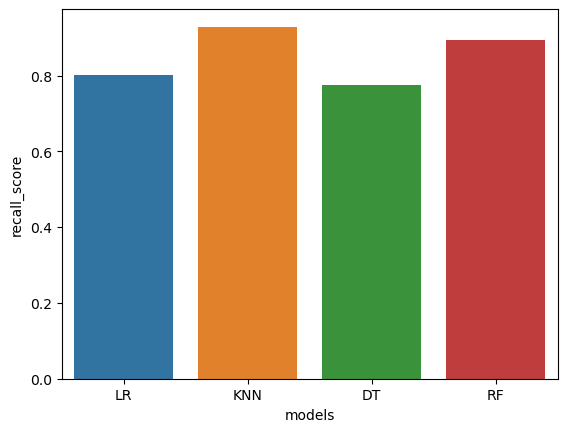

In [375]:
sns.barplot(x=r_score.models,y=r_score.recall_score)